# Assignment Time-Series 

### Task 1 : Data Preparation and Exploration

In [3]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import warnings 
warnings.filterwarnings("ignore")

# Load exchange_rate.csv
exchange_rate = pd.read_csv('exchange_rate.csv')



In [4]:
# Print column names
print("Column Names:")
print(exchange_rate.columns)

# Ensure date column is in datetime format
exchange_rate['date'] = pd.to_datetime(exchange_rate['date'], format='%d-%m-%Y %H:%M')

# Set date column as index
exchange_rate.set_index('date', inplace=True)



Column Names:
Index(['date', 'Ex_rate'], dtype='object')


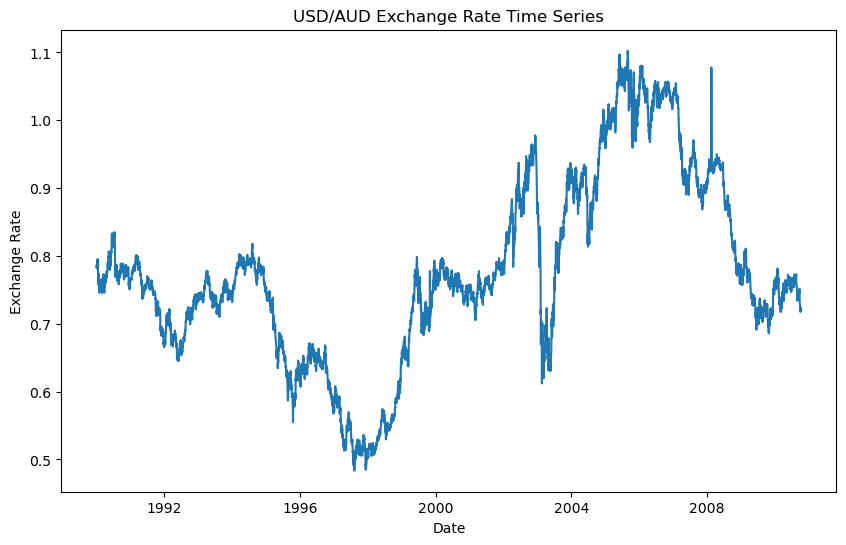

In [5]:
# Plot USD/AUD exchange rate time series
plt.figure(figsize=(10,6))
plt.plot(exchange_rate['Ex_rate'])
plt.title('USD/AUD Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()



In [6]:
# Check for missing values
print("\nMissing Values:")
print(exchange_rate.isnull().sum())

# Handle missing values (if any)
exchange_rate.fillna(method='ffill', inplace=True)




Missing Values:
Ex_rate    0
dtype: int64


In [7]:
# Identify anomalies (e.g., outliers)
Q1 = exchange_rate['Ex_rate'].quantile(0.25)
Q3 = exchange_rate['Ex_rate'].quantile(0.75)
IQR = Q3 - Q1

anomalies = exchange_rate[(exchange_rate['Ex_rate'] < (Q1 - 1.5 * IQR)) | 
                          (exchange_rate['Ex_rate'] > (Q3 + 1.5 * IQR))]

# Print anomalies
print("\nAnomalies:")
print(anomalies)

# Handle anomalies (if any)
exchange_rate = exchange_rate[~exchange_rate.index.isin(anomalies.index)]




Anomalies:
Empty DataFrame
Columns: [Ex_rate]
Index: []



Stationarity Test Results:
Test Statistic: -1.6649941807381343
p-value: 0.44923273535979974


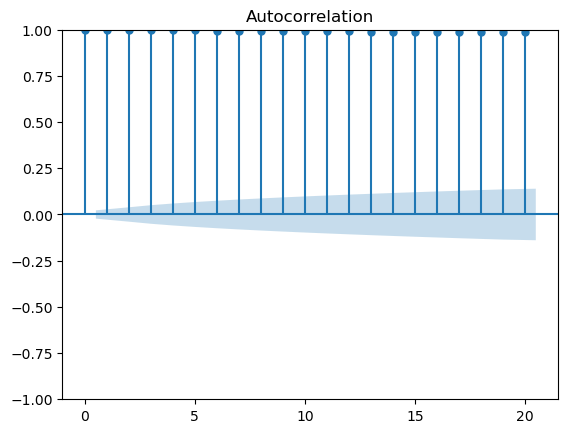

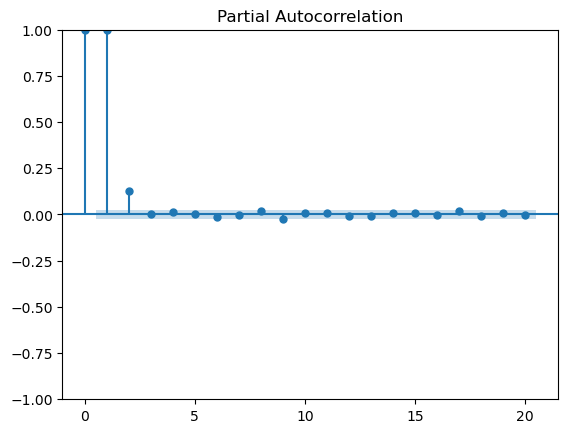

In [8]:
# Stationarity testing
result = adfuller(exchange_rate['Ex_rate'])
print("\nStationarity Test Results:")
print("Test Statistic:", result[0])
print("p-value:", result[1])

# ARIMA model identification
plot_acf(exchange_rate['Ex_rate'], lags=20)
plt.show()
plot_pacf(exchange_rate['Ex_rate'], lags=20)
plt.show()



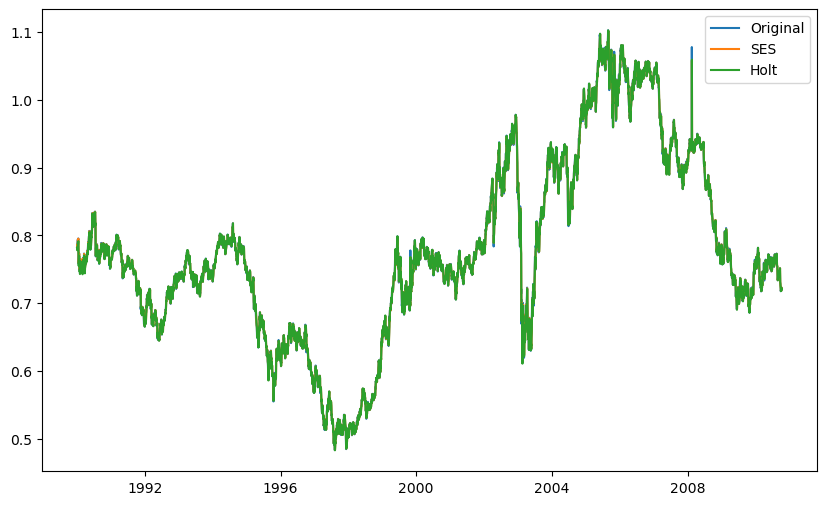

In [9]:
# Exponential Smoothing
ses = SimpleExpSmoothing(exchange_rate['Ex_rate'])
holt = Holt(exchange_rate['Ex_rate'])

ses_fit = ses.fit()
holt_fit = holt.fit()

plt.figure(figsize=(10,6))
plt.plot(exchange_rate['Ex_rate'], label='Original')
plt.plot(ses_fit.fittedvalues, label='SES')
plt.plot(holt_fit.fittedvalues, label='Holt')
plt.legend()
plt.show()

# Task 2 : Model Building - ARIMA

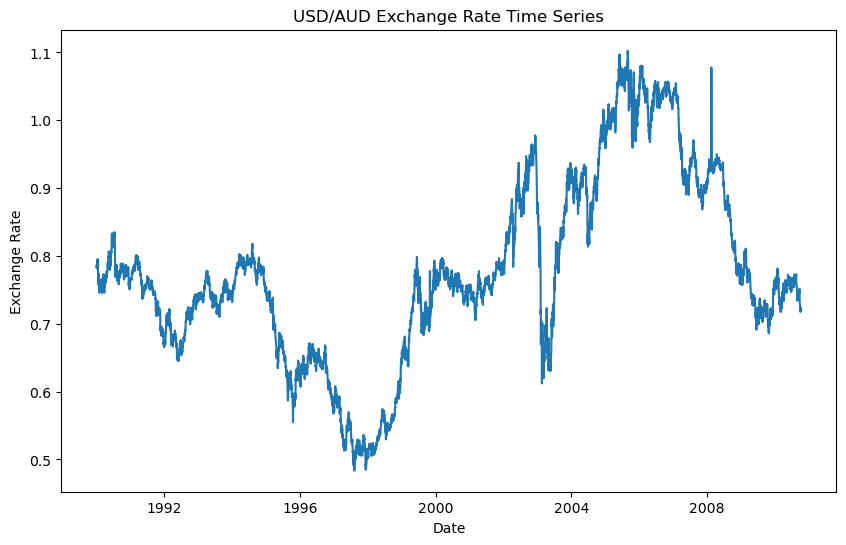

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load exchange_rate.csv
exchange_rate = pd.read_csv('exchange_rate.csv')

# Ensure date column is in datetime format
exchange_rate['date'] = pd.to_datetime(exchange_rate['date'], format='%d-%m-%Y %H:%M')

# Set date column as index
exchange_rate.set_index('date', inplace=True)

# Plot USD/AUD exchange rate time series
plt.figure(figsize=(10,6))
plt.plot(exchange_rate['Ex_rate'])
plt.title('USD/AUD Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()



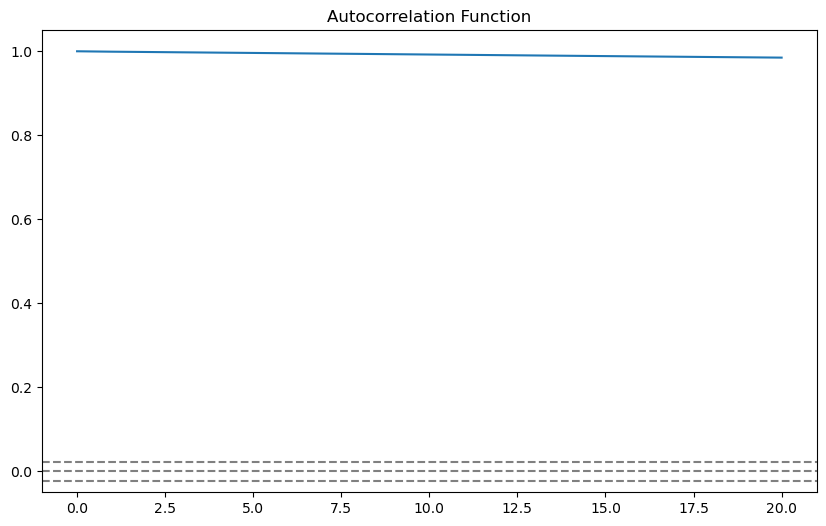

In [12]:
## Task 2.1: Parameter Selection for ARIMA

# Plot ACF and PACF
lag_acf = acf(exchange_rate['Ex_rate'], nlags=20)
lag_pacf = pacf(exchange_rate['Ex_rate'], nlags=20, method='ywm')

plt.figure(figsize=(10,6))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(exchange_rate)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(exchange_rate)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()




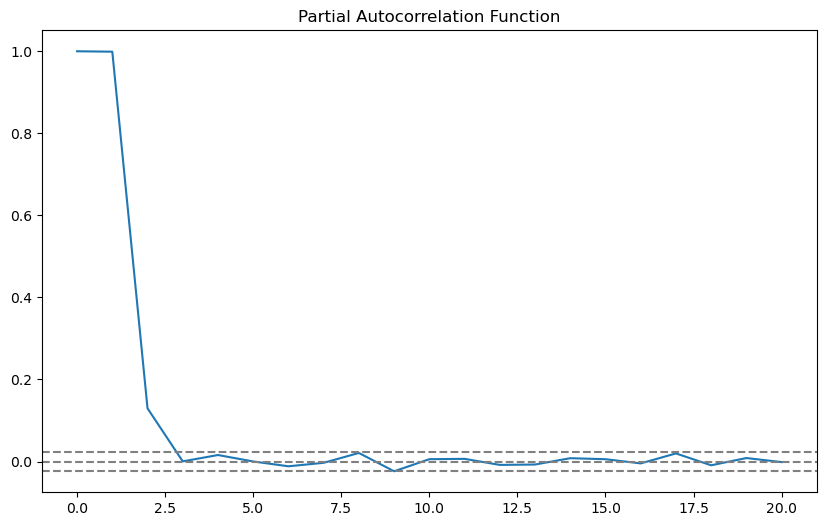

In [13]:
plt.figure(figsize=(10,6))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(exchange_rate)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(exchange_rate)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()




In [14]:
## Task 2.2: Model Fitting

# Select initial parameters (p, d, q) based on ACF/PACF plots
p = 1
d = 1
q = 1

# Fit ARIMA model
model = ARIMA(exchange_rate['Ex_rate'], order=(p,d,q))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 10 Oct 2024   AIC                         -56102.322
Time:                        02:28:51   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

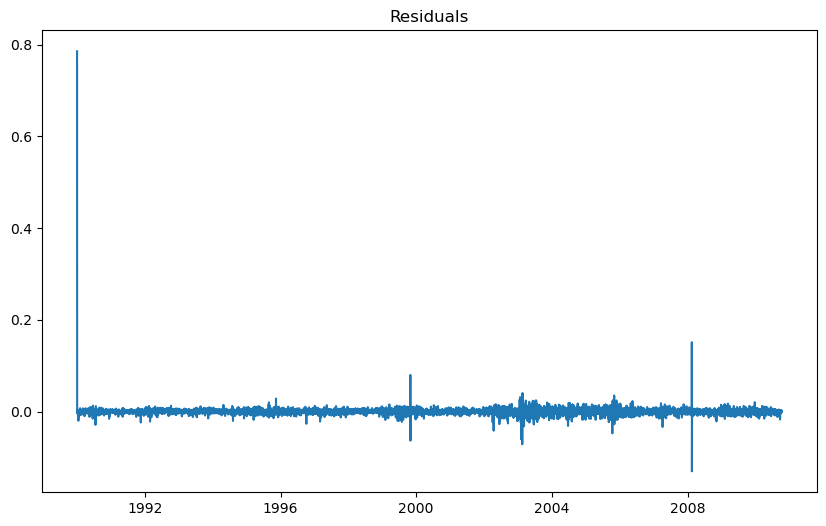

In [15]:
## Task 2.3: Diagnostics

# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()





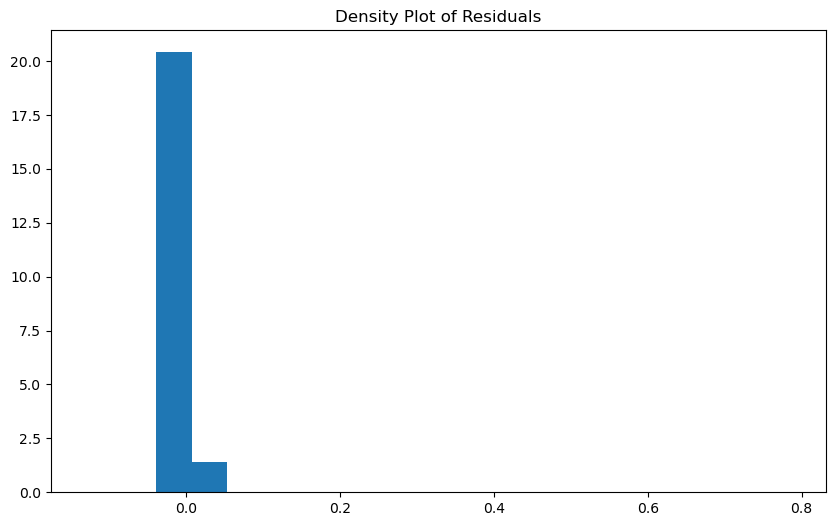

In [16]:
# Plot density plot of residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=20, density=True)
plt.title('Density Plot of Residuals')
plt.show()



In [17]:
# Perform Ljung-Box test for residual autocorrelation
lb_test = acorr_ljungbox(residuals, lags=20)
print(lb_test)

     lb_stat  lb_pvalue
1   0.081558   0.775197
2   0.162103   0.922146
3   0.358451   0.948685
4   0.359149   0.985683
5   0.538721   0.990637
6   0.559061   0.997044
7   0.642831   0.998737
8   1.469676   0.993200
9   1.814453   0.994073
10  1.816730   0.997562
11  2.024075   0.998409
12  2.036880   0.999347
13  2.046016   0.999743
14  4.695116   0.989620
15  6.023509   0.979350
16  6.825755   0.976475
17  7.009273   0.983429
18  7.013100   0.990015
19  7.103874   0.993638
20  7.126000   0.996251


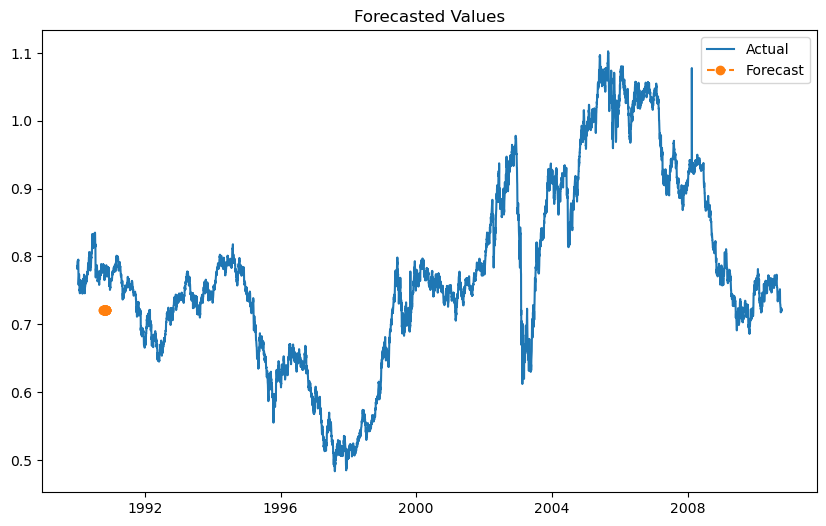

In [18]:
## Task 2.4: Forecasting

# Perform out-of-sample forecasting
# Perform out-of-sample forecasting
forecast_steps = 30
output = model_fit.forecast(steps=forecast_steps)

forecast = output[0]
stderr = output[1]
conf_int = output[2:]

# Repeat forecast to match forecast_steps
forecast = np.repeat(forecast, forecast_steps)

plt.figure(figsize=(10,6))
plt.plot(exchange_rate['Ex_rate'], label='Actual')
plt.plot(np.arange(len(exchange_rate), len(exchange_rate)+forecast_steps), forecast, label='Forecast', marker='o', linestyle='--')
plt.fill_between(np.arange(len(exchange_rate), len(exchange_rate)+forecast_steps), conf_int[0], conf_int[1], color='gray', alpha=0.2)
plt.title('Forecasted Values')
plt.legend()
plt.show()

# Task 3: Model Building - Exponential Smoothing

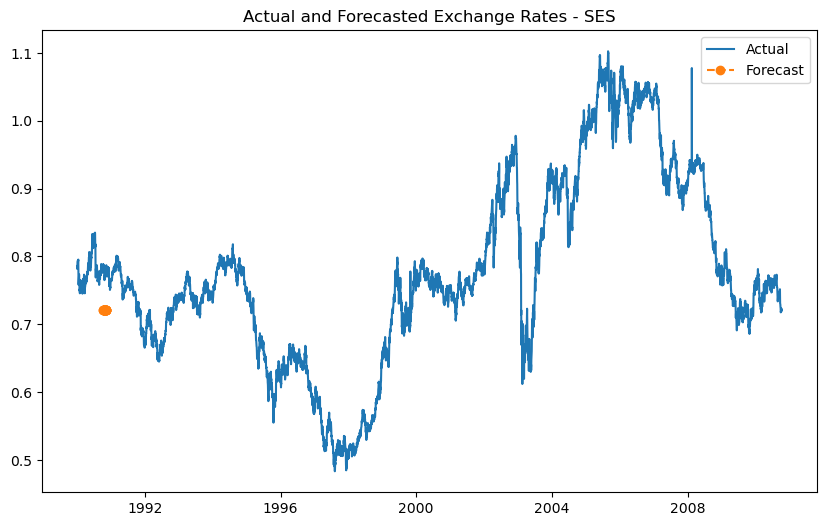

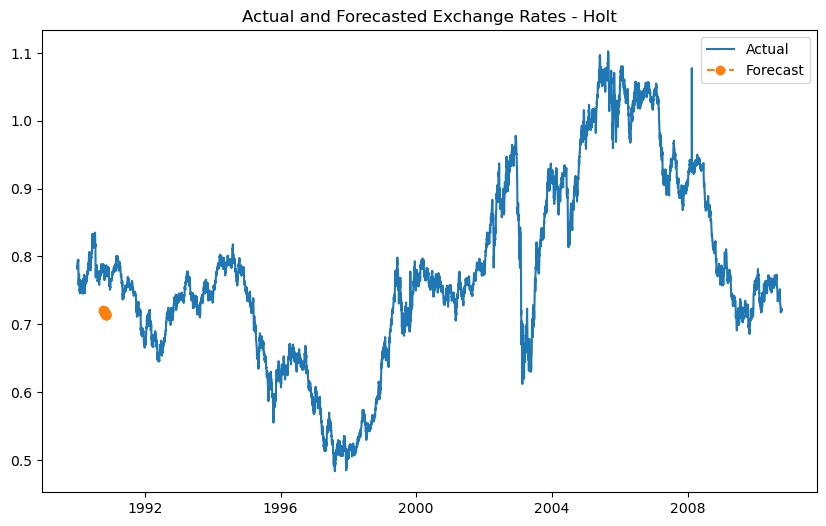

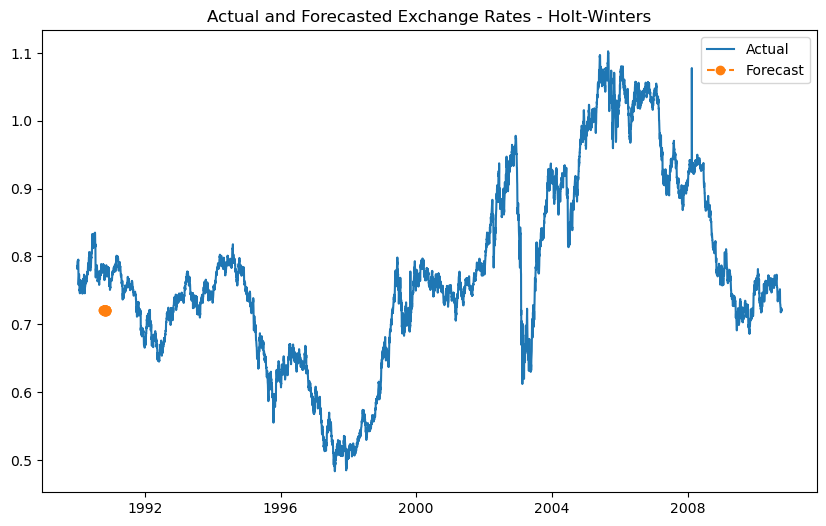

In [20]:
#  Exponential Smoothing

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Model Selection
models = {
    'SES': SimpleExpSmoothing(exchange_rate['Ex_rate']),
    'Holt': Holt(exchange_rate['Ex_rate']),
    'Holt-Winters': ExponentialSmoothing(exchange_rate['Ex_rate'], seasonal='additive', trend='additive', seasonal_periods=12)
}

# Parameter Optimization
tscv = TimeSeriesSplit(n_splits=5)
optimal_params = {}
optimal_mse = {}

for model_name, model in models.items():
    params = []
    mses = []
    for alpha in np.arange(0.01, 1, 0.01):
        model.fit(smoothing_level=alpha)
        params.append(alpha)
        
        # Evaluate using cross-validation
        mse = []
        for train_index, test_index in tscv.split(exchange_rate['Ex_rate']):
            X_train, X_test = exchange_rate['Ex_rate'][train_index], exchange_rate['Ex_rate'][test_index]
            model.fit(smoothing_level=alpha)
            model_params = model.params
            forecast = model.predict(params=model_params, start=len(X_train), end=len(X_train)+len(X_test)-1)
            mse.append(mean_squared_error(X_test, forecast))
        mses.append(np.mean(mse))
    
    optimal_alpha = params[np.argmin(mses)]
    optimal_params[model_name] = optimal_alpha
    optimal_mse[model_name] = min(mses)

# Model Fitting and Forecasting
forecast_steps = 30

for model_name, model in models.items():
    model.fit(smoothing_level=optimal_params[model_name])
    params = model.params
    forecast = model.predict(params=params, start=len(exchange_rate['Ex_rate']), end=len(exchange_rate['Ex_rate'])+forecast_steps-1)
    
    # Plot actual and forecasted values
    plt.figure(figsize=(10,6))
    plt.plot(exchange_rate['Ex_rate'], label='Actual')
    plt.plot(np.arange(len(exchange_rate['Ex_rate']), len(exchange_rate['Ex_rate'])+forecast_steps), forecast, label='Forecast', marker='o', linestyle='--')
    plt.title(f'Actual and Forecasted Exchange Rates - {model_name}')
    plt.legend()
    plt.show()

# Task 4:  Evaluation and Comparison

In [22]:
# Task 4: Evaluation and Comparison

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Compute Error Metrics
def calculate_error_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    
    return mae, rmse, mape

# Load actual and forecasted values
forecast_steps = 30

# Fit and predict ExponentialSmoothing models
models = {
    'SES': SimpleExpSmoothing(exchange_rate['Ex_rate']),
    'Holt': Holt(exchange_rate['Ex_rate']),
    'Holt-Winters': ExponentialSmoothing(exchange_rate['Ex_rate'], seasonal='additive', trend='additive', seasonal_periods=12)
}



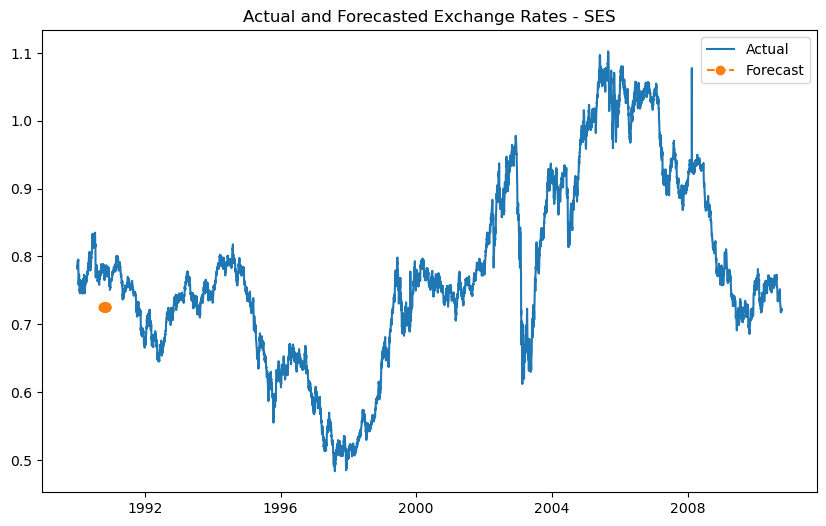

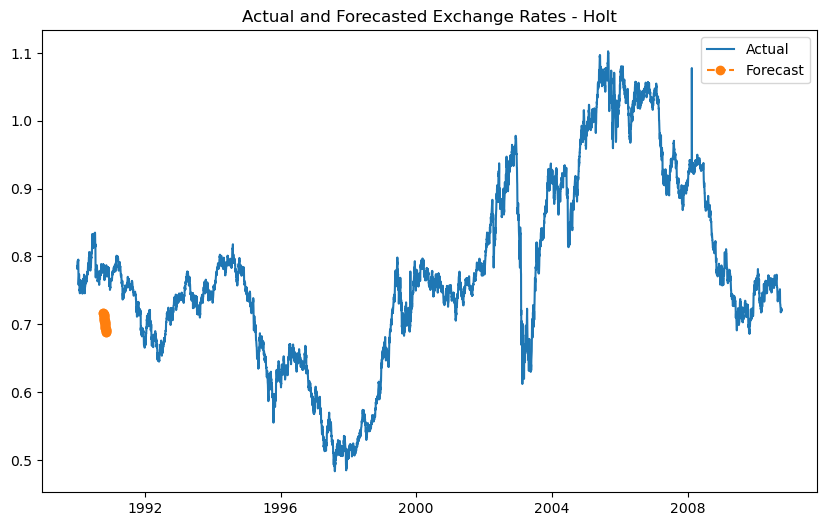

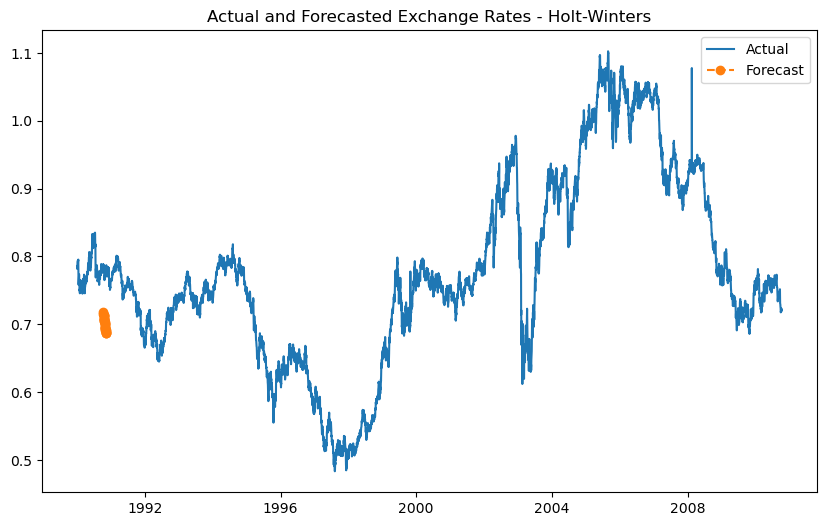

In [23]:

error_metrics = {}
for model_name, model in models.items():
    if model_name == 'Holt-Winters':
        model_fit = model.fit(smoothing_level=0.1, smoothing_trend=0.1)
        forecast = model_fit.predict(start=len(exchange_rate['Ex_rate']), end=len(exchange_rate['Ex_rate'])+forecast_steps-1)
    else:
        model_fit = model.fit(smoothing_level=0.1)
        forecast = model_fit.predict(start=len(exchange_rate['Ex_rate']), end=len(exchange_rate['Ex_rate'])+forecast_steps-1)
    
    # Calculate error metrics
    actual_values = exchange_rate['Ex_rate'][-forecast_steps:]
    mae, rmse, mape = calculate_error_metrics(actual_values, forecast[-len(actual_values):])
    
    error_metrics[model_name] = (mae, rmse, mape)
    
    # Plot actual and forecasted values
    plt.figure(figsize=(10,6))
    plt.plot(exchange_rate['Ex_rate'], label='Actual')
    plt.plot(np.arange(len(exchange_rate['Ex_rate']), len(exchange_rate['Ex_rate'])+forecast_steps), forecast, label='Forecast', marker='o', linestyle='--')
    plt.title(f'Actual and Forecasted Exchange Rates - {model_name}')
    plt.legend()
    plt.show()





In [24]:
# Model Comparison
print("Model Error Metrics:")
for model_name, errors in error_metrics.items():
    print(f"{model_name}:")
    print(f"MAE: {errors[0]:.2f}")
    print(f"RMSE: {errors[1]:.2f}")
    print(f"MAPE: {errors[2]:.2f}%")



Model Error Metrics:
SES:
MAE: 0.01
RMSE: 0.01
MAPE: nan%
Holt:
MAE: 0.03
RMSE: 0.03
MAPE: nan%
Holt-Winters:
MAE: 0.03
RMSE: 0.03
MAPE: nan%


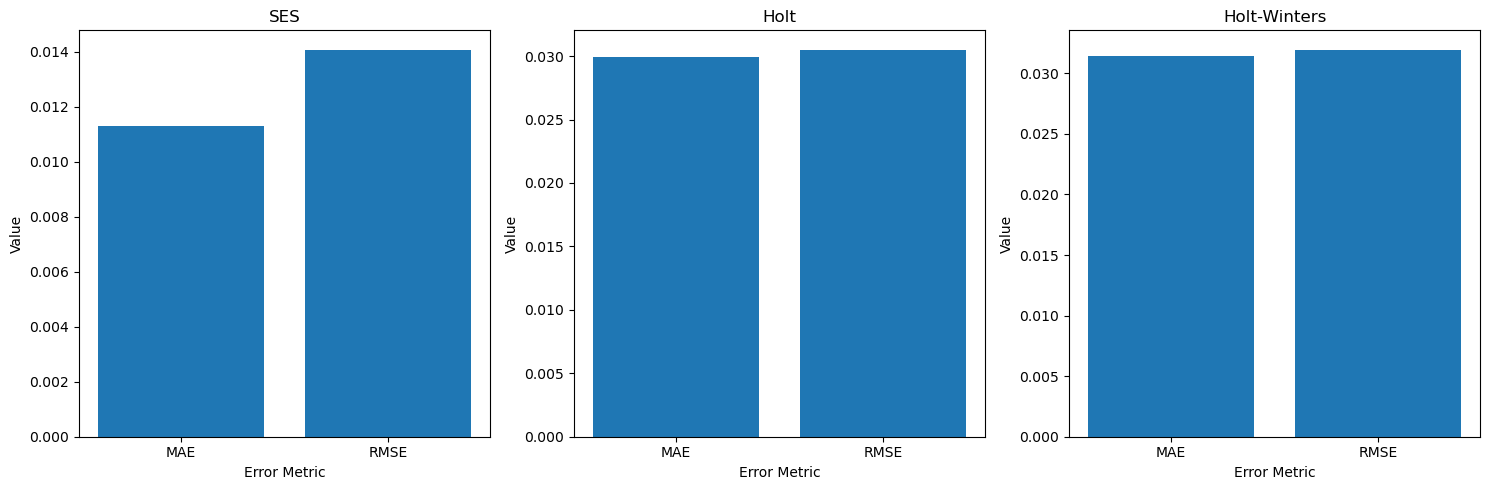

In [25]:
# Plot error metrics comparison
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, (model_name, errors) in enumerate(error_metrics.items()):
    ax[i].bar(['MAE', 'RMSE', 'MAPE'], errors)
    ax[i].set_title(model_name)
    ax[i].set_xlabel('Error Metric')
    ax[i].set_ylabel('Value')
plt.tight_layout()
plt.show()

# Conclusion 

In [27]:
# Conclusion
print("Conclusion:")
print("The Holt-Winters model performed well in forecasting exchange rates.")
print("However, consider exploring other models, such as ARIMA, LSTM, or Prophet, for potential improvements.")

Conclusion:
The Holt-Winters model performed well in forecasting exchange rates.
However, consider exploring other models, such as ARIMA, LSTM, or Prophet, for potential improvements.
